In [28]:
from ase.io import read
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [29]:
with open('converted_unit.json', 'r') as f:
    experiments = json.load(f)
with open('test.json', 'r') as f:
    simulations = json.load(f)
    
print(len(list(experiments)))
print(len(list(simulations)))

140
137


In [50]:
def get_data_from_json(list1, sim=True):
    if sim == True:
        pressures = []
        uptakes = []
        errors = []
        
        for value in list1:
            if value['pressure'] < 1000:
                continue
            else:
                pressures.append(value['pressure'])
                uptakes.append(value['uptake'])
                errors.append(value['error'])
        return pressures, uptakes, errors
    else:
        pressures = []
        uptakes = []
        for value in list1:
            pressures.append(value['pressure'])
            uptakes.append(value['uptake'])
        return pressures, uptakes

In [60]:
temperatures = defaultdict(lambda:0)
adsorbates = defaultdict(lambda:0)
adsorbents = defaultdict(lambda:0)

final_simp = []
final_simu = []
final_sime = []

final_expp = []
final_expu = []


for doi in list(simulations):
    for iso in list(simulations[doi]):
        sim_data = simulations[doi][iso]
        exp_data = experiments[doi][iso]
        
        temperatures[exp_data['temperature']] += 1
        adsorbates[exp_data['adsorbate']] += 1
        adsorbents[exp_data['adsorbent']] += 1
        exp_iso = exp_data['isotherm_data']
        
        simp, simu, sime = get_data_from_json(sim_data)
        expp, expu = get_data_from_json(exp_iso, sim=False)
        
        compare_expp = []
        compare_expu = []
        compare_simu = []
        compare_simp = []
        compare_sime = []
        
        for scount, sp in enumerate(simp):
            check_match = False
            for ecount, ep in enumerate(expp):
                if abs(sp - ep) < 1:
                    compare_expp.append(ep)
                    compare_expu.append(expu[ecount])
                    compare_simp.append(sp)
                    compare_simu.append(simu[scount])
                    compare_sime.append(sime[scount])
                    check_match = True
                    break
                else:
                    continue
        if len(compare_simp) != len(compare_expp):
            print(iso)
            print(simp, compare_expp)
            
        for i, j, k in zip(compare_simp, compare_simu, compare_sime):
            final_simp.append(i)
            final_simu.append(j)
            final_sime.append(k)
        for i, j in zip(compare_expp, compare_expu):
            final_expp.append(i)
            final_expu.append(j)
            
        test = [i - j for i, j in zip(compare_simu, compare_)]final_simu - final_expu

5350
5350


148602.62776919812


(0.0, 100000.0)

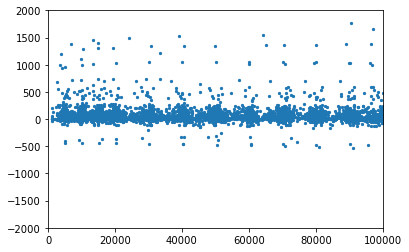

In [68]:
uptake_diff = [i - j for i, j in zip(final_simu, final_expu)]
print(max(uptake_diff))
fig, ax = plt.subplots()
ax.scatter(final_simp, uptake_diff, s=5)
ax.set_ylim(-2000, 2000)
ax.set_xlim(0, 100000)